Total de títulos en OpenAlex: 135
Total de títulos en Scopus: 114
Total de títulos duplicados: 83
Total de títulos en Scopus que no están en OpenAlex: 31
Total de títulos en OpenAlex que no están en Scopus: 52


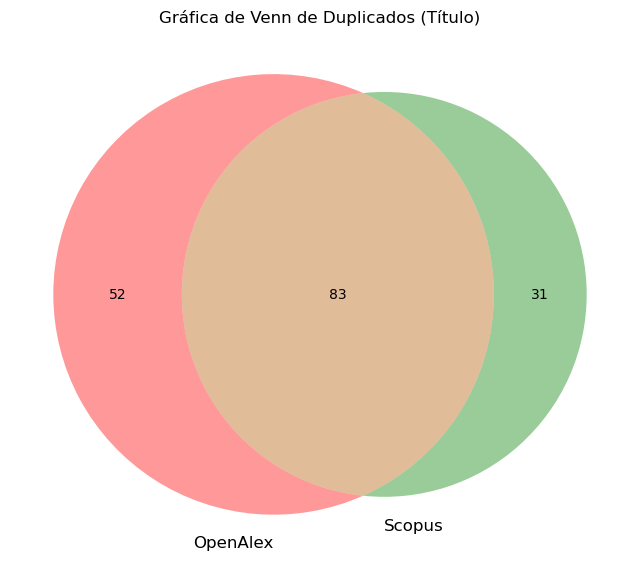

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Leer los archivos CSV
df1 = pd.read_csv('OpenAlex_seismic_waves_both.csv')
df2 = pd.read_csv('Scopus_seismic_waves_both.csv')

# Crear conjuntos de títulos para cada DataFrame
set1 = set(df1['Title'])
set2 = set(df2['Title'])

# Identificar títulos duplicados
duplicated_titles = set1 & set2
duplicated_df = df1[df1['Title'].isin(duplicated_titles)]

# Filtrar el DataFrame de Scopus para excluir los duplicados
scopus_no_duplicates = df2[~df2['Title'].isin(duplicated_titles)]

# Guardar los títulos duplicados en un archivo CSV
duplicated_titles_df = pd.DataFrame(list(duplicated_titles), columns=['Title'])
duplicated_titles_df.to_csv('duplicated_titles.csv', index=False)

# Guardar los títulos en OpenAlex que no están duplicados con Scopus en un archivo CSV
titles_in_openalex_not_in_scopus = set1 - set2
titles_not_in_scopus_df = pd.DataFrame(list(titles_in_openalex_not_in_scopus), columns=['Title'])
titles_not_in_scopus_df.to_csv('titles_not_in_scopus.csv', index=False)


# Guardar solo los títulos en OpenAlex que no están duplicados con Scopus en un archivo CSV
titles_in_openalex_not_in_scopus = set1 - set2
titles_not_in_scopus_df = df1[df1['Title'].isin(titles_in_openalex_not_in_scopus)][['Title']]
titles_not_in_scopus_df.to_csv('titles_not_in_scopus.csv', index=False)

# Imprimir los totales
print(f"Total de títulos en OpenAlex: {len(set1)}")
print(f"Total de títulos en Scopus: {len(set2)}")
print(f"Total de títulos duplicados: {len(duplicated_titles)}")
print(f"Total de títulos en Scopus que no están en OpenAlex: {len(titles_in_scopus_not_in_openalex)}")
print(f"Total de títulos en OpenAlex que no están en Scopus: {len(titles_in_openalex_not_in_scopus)}")

# Crear la gráfica de Venn con los conjuntos de títulos
plt.figure(figsize=(8, 8))
venn2([set1, set2], ('OpenAlex', 'Scopus'))
plt.title('Gráfica de Venn de Duplicados (Título)')
plt.show()